In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Idea
Solve heat equation

\begin{equation}
    \dfrac{\partial T}{\partial t} = \kappa \nabla^2 T = \kappa \left(\dfrac{\partial^2 T}{\partial x^2} + \dfrac{\partial^2 T}{\partial y^2}\right)
\end{equation}

https://glaciers.gi.alaska.edu/sites/default/files/Notes_thermodynamics_Aschwanden.pdf

In [2]:
T0 = np.load('data/landsat_7_img_0_snow_ice.npy')

In [3]:
# Fill NaN values with 288
T0[np.isnan(T0)] = 288

In [22]:
Ny, Nx = T0.shape
Nt = 1000

In [23]:
def F(T, k, dx, dy):
    # Assuming periodic boundary conditions
    T_ij = np.copy(T)
    T_ip1j = np.roll(T, -1, axis=1)
    T_im1j = np.roll(T, 1, axis=1)
    T_ijp1 = np.roll(T, -1, axis=0)
    T_ijm1 = np.roll(T, 1, axis=0)
    Txx = (T_ip1j + T_im1j - 2*T_ij) / dx**2
    Tyy = (T_ijp1 + T_ijm1 - 2*T_ij) / dy**2 
    return k * (Txx + Tyy)

In [24]:
t_min, t_max = 0, 3600 * 24 # 1 day
x = np.linspace(0, 30 * (Nx - 1), Nx)
y = np.linspace(0, 30 * (Ny - 1), Ny)
t = np.linspace(t_min, t_max, Nt)
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]
k = 10e-7 # Thermal diffusivity of snow and ice ranges between 9e-7 to 15e-7 in m^2 s^{-1} 
# https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/GM007p0178 --> 11.6e-7

In [25]:
def euler_method(T0, F, k, dx, dy, dt, Nt):
    T = np.copy(T0)
    for n in range(Nt):
        T += dt * F(T, k, dx, dy)
    return T

In [26]:
T = euler_method(T0, F, k, dx, dy, dt, Nt)

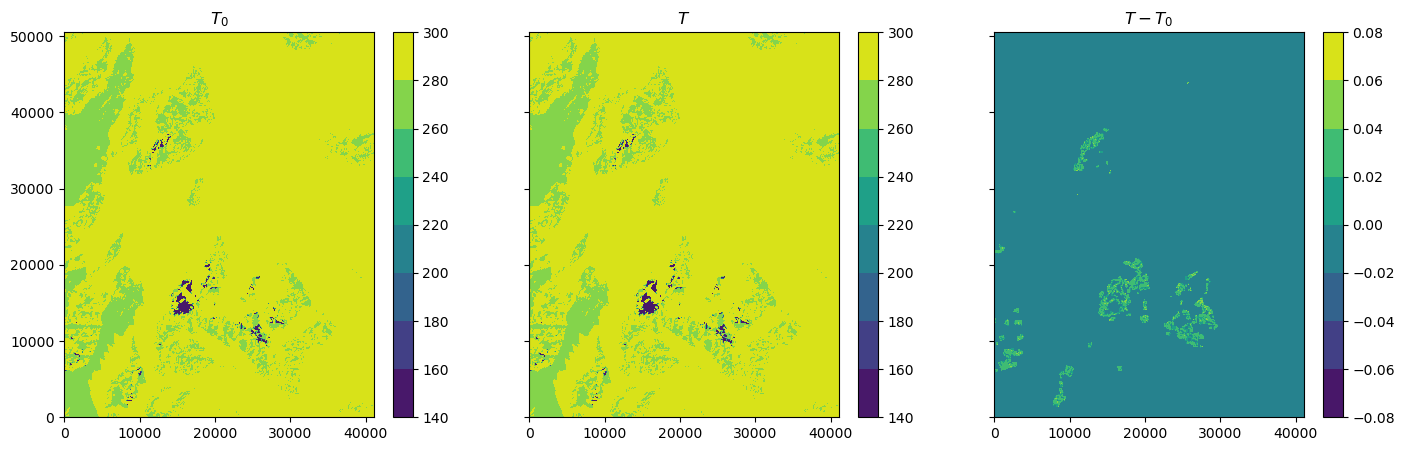

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)
plt.title(r"$T_0$")
p1 = axes[0].contourf(x, y, T0)
p2 = axes[1].contourf(x, y, T)
p3 = axes[2].contourf(x, y, T-T0)
axes[0].set_title(r"$T_0$")
axes[1].set_title(r"$T$")
axes[2].set_title(r"$T - T_0$")
fig.colorbar(p1, ax=axes[0])
fig.colorbar(p2, ax=axes[1])
fig.colorbar(p3, ax=axes[2])
plt.show()